[4, 20, 28, 116, 62, 44, 12, 80, 4, 8, 4, 168, 28, 694, 668, 60, 60, 656, 464, 56, 540, 224, 8, 204, 580, 224, 548, 8, 1012, 2, 128, 2, 36, 24, 36, 12, 4, 240, 172, 12, 4, 184, 128, 32, 106, 24, 8, 472, 384, 40, 4, 22, 324, 264, 174, 68, 8, 8, 4, 942, 832, 20, 126, 152, 320, 8, 4, 2, 4, 26, 288, 518, 2, 776, 30, 260, 592, 2, 4, 888, 336, 952, 4, 116, 24, 4, 108, 128, 20, 6, 20, 146, 42, 132, 2, 756, 8, 296, 8, 22, 2, 8, 16, 120, 4, 112, 256, 4, 48, 248, 192, 144, 28, 32, 4, 564, 8, 868, 924, 4, 4, 362, 8, 8, 36, 64, 226, 1008, 168, 326, 244, 788, 100, 12, 28, 4, 130, 724, 14, 484, 4, 12, 12, 56, 8, 390, 10, 264, 36, 152, 118, 452, 156, 32, 452, 4, 144, 202, 456, 300, 224, 50, 94, 64, 260, 24, 316, 16, 584, 18, 410, 4, 12, 656, 166, 2, 12, 268, 40, 4, 36, 784, 2, 12, 56, 2, 16, 4, 12, 624, 6, 12, 12, 4, 76, 48, 4, 16, 34, 512, 24, 6, 52, 700, 178, 64, 32, 4, 464, 4, 276, 32, 2, 972, 616, 80, 996, 28, 50, 336, 34, 36, 8, 950, 12, 246, 190, 4, 2, 4, 6, 160, 28, 456, 382, 220, 108, 12, 684

(array([5272., 1081.,  626.,  469.,  321.,  325.,  220.,  253.,  201.,
         163.,  150.,  133.,  146.,   96.,  107.,   85.,   92.,   96.,
          74.,   90.]),
 array([   2. ,   53.1,  104.2,  155.3,  206.4,  257.5,  308.6,  359.7,
         410.8,  461.9,  513. ,  564.1,  615.2,  666.3,  717.4,  768.5,
         819.6,  870.7,  921.8,  972.9, 1024. ]),
 <BarContainer object of 20 artists>)

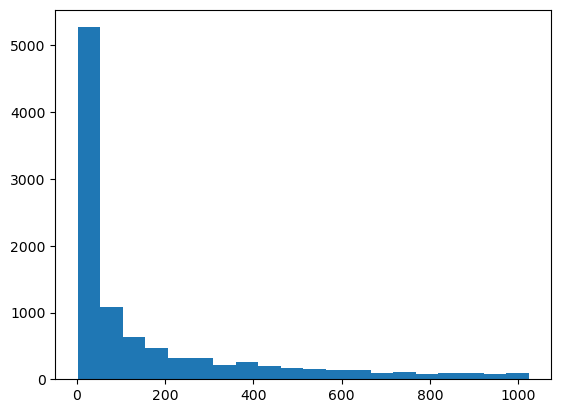

In [7]:
from ray import tune
import matplotlib.pyplot as plt

def plot_dist(sampler, n=int(1e4)):
    results = (sampler.sample() for _ in range(n))
    results = list(results)
    print(results)
    
    return plt.hist(results, bins = 20)


# plot_dist(tune.uniform(2, 10))
plot_dist(tune.qlograndint(2, 1024, 2, 2))

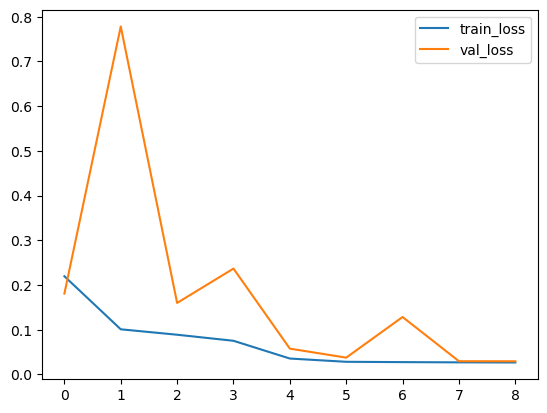

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../lightning_logs/version_0/metrics.csv")

mask_train_loss = df.train_loss_epoch.notna()
mask_val_loss = df.val_loss.notna()

df1 = df[mask_train_loss]
df2 = df[mask_val_loss]

train_loss = df1.train_loss_epoch
val_loss = df2.val_loss
x = range(len(train_loss))

plt.plot(x, train_loss, label='train_loss')
plt.plot(x, val_loss, label='val_loss')
plt.legend()
plt.show()